In [42]:
import osmnx as ox
import geopandas as gpd
import os
import math
import numpy as np
import matplotlib.pyplot as plt

In [18]:
parking_tags = {'amenity':'parking'}
hamilton_tags = { 'OSM':'relation 3169198', 'admin_level':'7', 'type':'boundary:administrative (village)'}
madison_tags = { 'OSM':'relation 3169202', 'admin_level':'7'}
hamilton_coords = (42.8268798,-75.5444159)
madison_coords = (42.8977412,-75.512291)

In [13]:
hamilton = ox.geometries_from_place('Town of Hamilton, New York, United States', hamilton_tags)
madison = ox.geometries_from_point(madison_coords, madison_tags)

In [14]:
print(hamilton.shape, madison.shape)

(1, 15) (1, 15)


In [15]:
hamilton_shape = hamilton[(hamilton['geometry'].geom_type == 'Polygon') | (hamilton['geometry'].geom_type == 'MultiPolygon')]
madison_shape = madison[(madison['geometry'].geom_type == 'Polygon') | (madison['geometry'].geom_type == 'MultiPolygon')]

In [16]:
print(hamilton_shape.shape, madison_shape.shape)

(1, 15) (1, 15)


In [17]:
hamilton_gdf = gpd.GeoDataFrame(geometry=list(hamilton_shape['geometry']), crs=4326)
hamilton_gdf.to_file('/Users/lily/Documents/GitHub/parking_lots/Hamilton.shp')
madison_gdf = gpd.GeoDataFrame(geometry=list(madison_shape['geometry']), crs=4326)
madison_gdf.to_file('/Users/lily/Documents/GitHub/parking_lots/Madison.shp')

In [19]:
hamilton_parking = ox.geometries_from_place('Town of Hamilton, New York, United States', parking_tags)
madison_parking = ox.geometries_from_place('Town of Madison, New York, United States', parking_tags)                                           

In [20]:
print(hamilton_parking.shape,madison_parking.shape)

(20, 14) (1, 8)


In [22]:
hamilton_parking_lots = hamilton_parking[(hamilton_parking['geometry'].geom_type == 'Polygon') | (hamilton_parking['geometry'].geom_type == 'MultiPolygon')]
madison_parking_lots = madison_parking[(madison_parking['geometry'].geom_type == 'Polygon') | (madison_parking['geometry'].geom_type == 'MultiPolygon')]

In [23]:
print(hamilton_parking_lots.shape,madison_parking_lots.shape)

(20, 14) (1, 8)


In [24]:
hamilton_parking_gdf = gpd.GeoDataFrame(geometry=list(hamilton_parking_lots['geometry']), crs=4326)
madison_parking_gdf = gpd.GeoDataFrame(geometry=list(madison_parking_lots['geometry']), crs=4326)
hamilton_parking_gdf.to_file('/Users/lily/Documents/GitHub/parking_lots/small_town/Hamilton_parking.shp')
madison_parking_gdf.to_file('/Users/lily/Documents/GitHub/parking_lots/small_town/Madison_parking.shp')

In [29]:
def convert_wgs_to_utm(lon, lat):
    utm_band = str((math.floor((lon + 180) / 6 ) % 60) + 1)
    if len(utm_band) == 1:
        utm_band = '0'+utm_band
    if lat >= 0:
        epsg_code = '326' + utm_band
    else:
        epsg_code = '327' + utm_band
    return epsg_code

In [26]:
hamilton_file = gpd.read_file('/Users/lily/Documents/GitHub/parking_lots/small_town/Hamilton.shp')
madison_file = gpd.read_file('/Users/lily/Documents/GitHub/parking_lots/small_town/Madison.shp')
hamilton_parking_file = gpd.read_file('/Users/lily/Documents/GitHub/parking_lots/small_town/Hamilton_parking.shp')
madison_parking_file = gpd.read_file('/Users/lily/Documents/GitHub/parking_lots/small_town/Madison_parking.shp')

In [28]:
hamilton_wgs = hamilton_file.to_crs(4326)
madison_wgs = madison_file.to_crs(4326)
hamilton_parking_wgs = hamilton_parking_file.to_crs(4326)
madison_parking_wgs = madison_parking_file.to_crs(4326)
hamilton_coords = hamilton_wgs.total_bounds
madison_coords = madison_wgs.total_bounds

In [32]:
long = hamilton_coords[0]
lat = hamilton_coords[0]
utm_zone = convert_wgs_to_utm(long, lat)
epsg = 'EPSG:' + utm_zone

In [34]:
hamilton_utm = hamilton_wgs.to_crs(epsg)
madison_utm = madison_wgs.to_crs(epsg)
hamilton_parking_utm = hamilton_parking_wgs.to_crs(epsg)
madison_parking_utm = madison_parking_wgs.to_crs(epsg)

In [35]:
# Calculate area of OSM city boundary
hamilton_area = hamilton_utm.area
madison_area = madison_utm.area

In [36]:
print(hamilton_area,madison_area)

0    1.072375e+08
dtype: float64 0    1.071289e+08
dtype: float64


In [39]:
hamilton_parking_utm['area'] = hamilton_parking_utm.area
madison_parking_utm['area'] = madison_parking_utm.area
hamilton_parking_utm['area_percent'] = (hamilton_parking_utm['area'] / hamilton_area) * 100
madison_parking_utm['area_percent'] = (madison_parking_utm['area'] / madison_area) * 100
hamilton_parking_sum = np.sum(hamilton_parking_utm['area'])
madison_parking_sum = np.sum(madison_parking_utm['area'])
hamilton_parking_percent = (hamilton_parking_sum / hamilton_area) * 100
madison_parking_percent = (madison_parking_sum / madison_area) * 100

In [40]:
print(hamilton_parking_percent,madison_parking_percent)

0    0.049587
dtype: float64 0    0.014073
dtype: float64


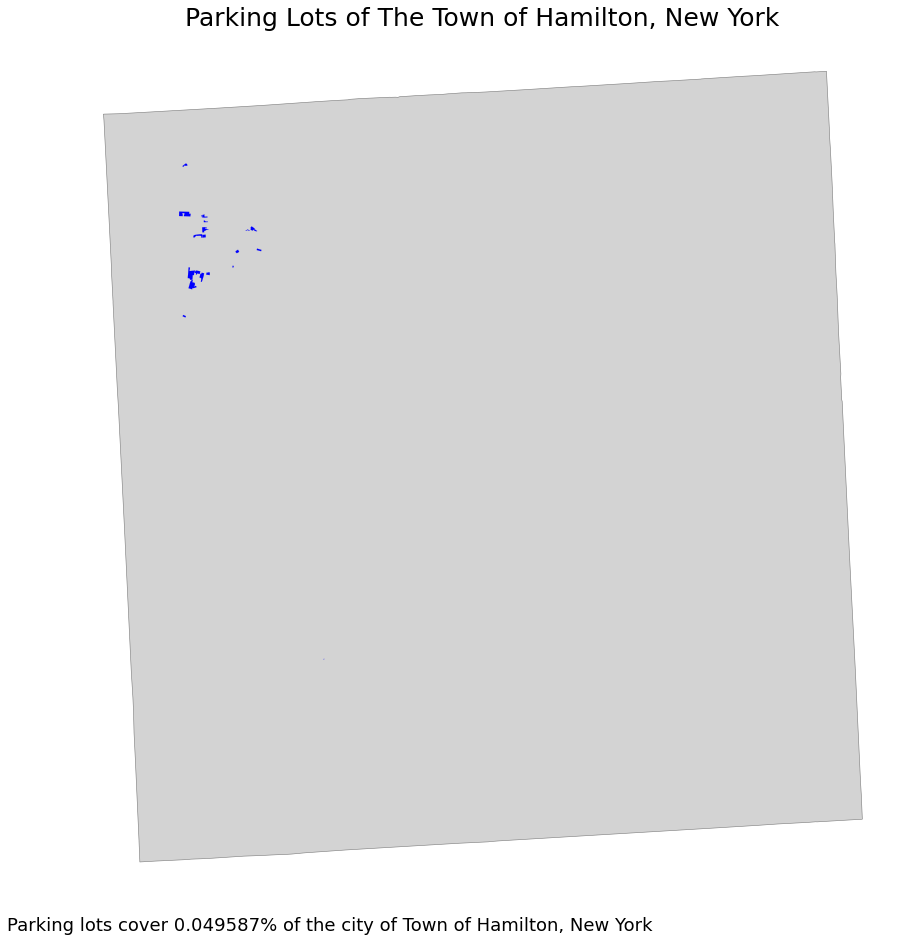

In [43]:
# Hamilton Data visualization
fig, ax = plt.subplots(figsize=(16,16))
hamilton_utm.plot(ax=ax, color='lightgray', edgecolor='grey', linewidth=0.6)
hamilton_parking_utm.plot(ax=ax, color='blue', edgecolor='blue', linewidth=0.1)
ax.axis('off')
plt.title('Parking Lots of The Town of Hamilton, New York', fontsize=25)
fig.text(.1,.1,'Parking lots cover 0.049587% of the city of Town of Hamilton, New York', fontsize=18)
plt.savefig('/Users/lily/Documents/GitHub/parking_lots/figures/Hamilton_parking_map.png')

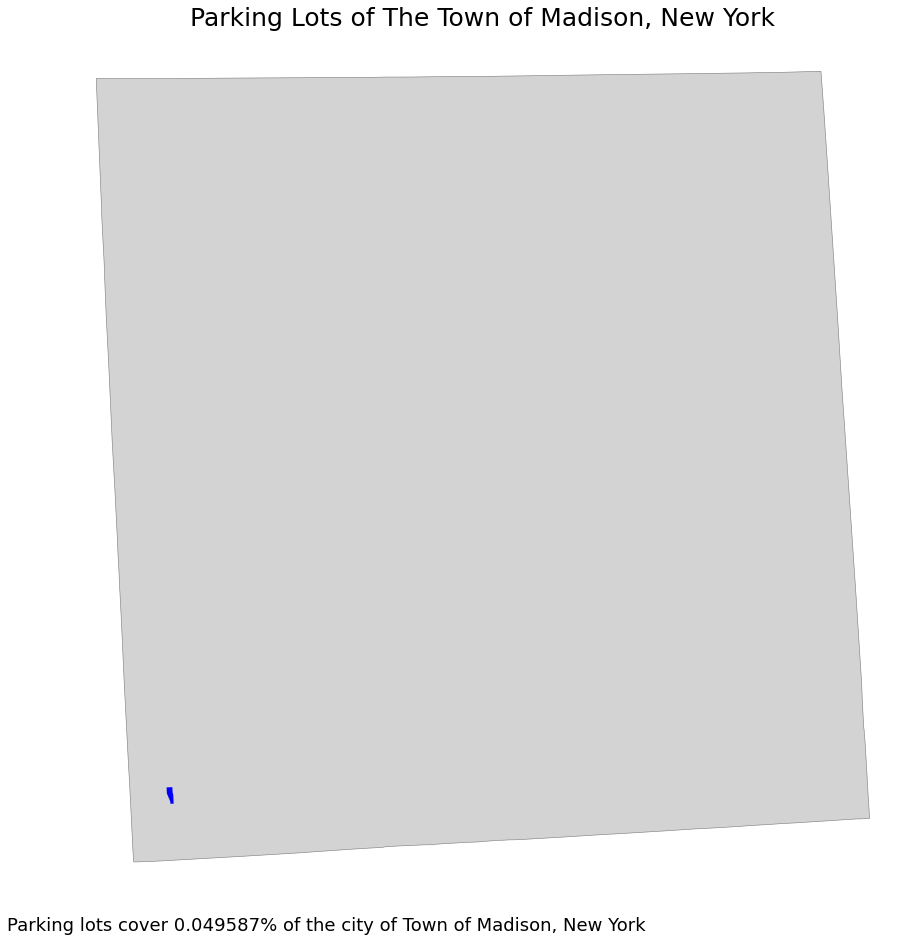

In [44]:
# Madison Data visualization
fig, ax = plt.subplots(figsize=(16,16))
madison_utm.plot(ax=ax, color='lightgray', edgecolor='grey', linewidth=0.6)
madison_parking_utm.plot(ax=ax, color='blue', edgecolor='blue', linewidth=0.1)
ax.axis('off')
plt.title('Parking Lots of The Town of Madison, New York', fontsize=25)
fig.text(.1,.1,'Parking lots cover 0.049587% of the city of Town of Madison, New York', fontsize=18)
plt.savefig('/Users/lily/Documents/GitHub/parking_lots/figures/Madison_parking_map.png')